In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import arviz as az
import pymc3 as pm
sns.set()
plt.style.use('fivethirtyeight')

In [34]:
print(az.__version__)

0.8.2


### Code 3.1
$Pr(vampire|positive) = \frac{P(positive|vampire)P(vampire)}{P(positive)} $
```
Applying Bayes Theorem
```

In [4]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
print(PrVP)

0.08683729433272395


### Code 3.2

In [5]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior
print(np.__version__)

1.16.2


In [6]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


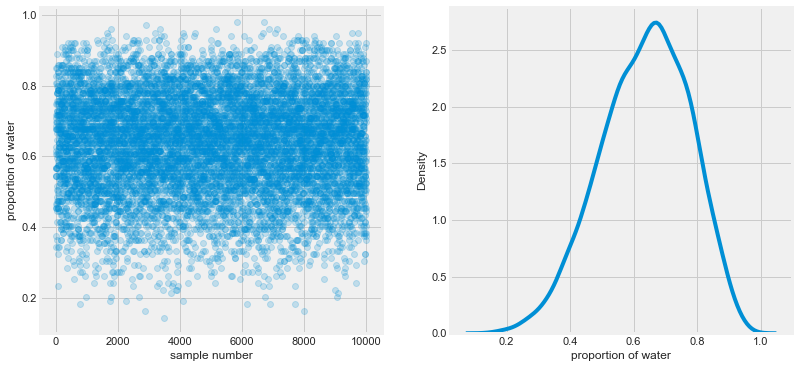

In [7]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples,'o',alpha=0.2)
ax0.set_xlabel('sample number')
ax0.set_ylabel('proportion of water')
sns.kdeplot(samples,ax =ax1)
ax1.set_xlabel('proportion of water')
ax1.set_ylabel('Density')
fig.show()

### Code 3.6

In [8]:
sum(posterior[ p_grid < 0.5 ])

0.17183313110747475

### Code 3.7

In [9]:
sum(samples < 0.5)/1e4

0.1731

### Code 3.8

In [10]:
sum((samples > 0.5) & (samples < 0.75))/1e4

0.6069

### Code 3.9

In [11]:
np.quantile(samples, q=0.8)

0.7575757575757577

### Code 3.10

In [12]:
np.quantile(samples,q = [0.1,0.9])

array([0.44444444, 0.80808081])

### Figure3.2

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


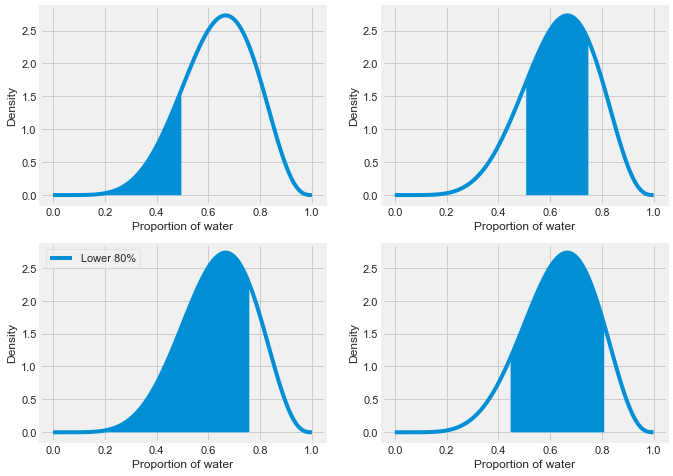

In [13]:
w,n = 6,9
x = np.linspace(0,1,100)
fig, axs = plt.subplots(2,2,figsize=(10,8))


cond = x < 0.5
sns.lineplot(x,stats.beta.pdf(x,w+1,n-w+1),ax=axs[0,0])
axs[0,0].fill_between(x[cond], stats.beta.pdf(x[cond],w+1,n-w+1))
axs[0,0].set_xlabel('Proportion of water')
axs[0,0].set_ylabel('Density')  


cond = (x > 0.5) & (x < 0.75)
sns.lineplot(x,stats.beta.pdf(x,w+1,n-w+1),ax=axs[0,1])
axs[0,1].fill_between(x[cond], stats.beta.pdf(x[cond],w+1,n-w+1))
axs[0,1].set_xlabel('Proportion of water')
axs[0,1].set_ylabel('Density')  


cond = (x < 0.76)
sns.lineplot(x,stats.beta.pdf(x,w+1,n-w+1),ax=axs[1,0],label = 'Lower 80%')
axs[1,0].fill_between(x[cond], stats.beta.pdf(x[cond],w+1,n-w+1))
axs[1,0].set_xlabel('Proportion of water')
axs[1,0].set_ylabel('Density')  



cond = (x > 0.44) & (x < 0.81)
sns.lineplot(x,stats.beta.pdf(x,w+1,n-w+1),ax=axs[1,1])
axs[1,1].fill_between(x[cond], stats.beta.pdf(x[cond],w+1,n-w+1))
axs[1,1].set_xlabel('Proportion of water')
axs[1,1].set_ylabel('Density')  

fig.show()


### Code 3.11

In [14]:
p_grid,posterior= posterior_grid_approx(grid_points=100,success=3,tosses=3)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)


### Code 3.12

In [15]:
PI_interval = np.quantile(samples,q = ([0.25,0.75]))
print(PI_interval)

[0.70707071 0.93939394]


### Code 3.13

In [43]:
hdpi_interval = pm.hpd(samples,hdi_prob = 0.5)
print(hdpi_interval)

hdpi_interval = az.hpd(samples, hdi_prob= 0.5)
print(hdpi_interval)


[0.50505051 1.        ]
[0.50505051 1.        ]


/anaconda3/lib/python3.6/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
/anaconda3/lib/python3.6/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


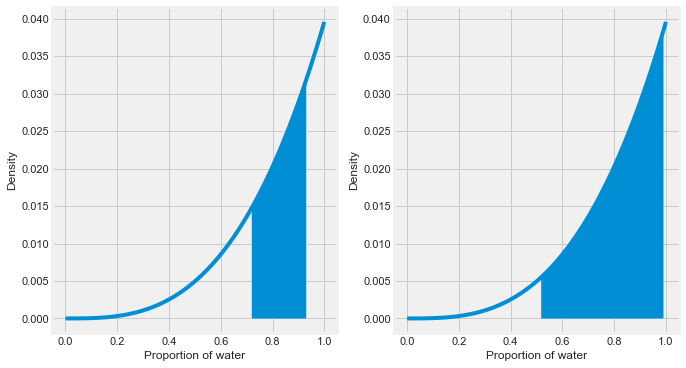

In [17]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
sns.lineplot(p_grid,posterior,ax=axs[0])
cond = (p_grid > PI_interval[0]) & (p_grid < PI_interval[1])
axs[0].fill_between(p_grid[cond], posterior[cond])
axs[0].set_xlabel('Proportion of water')
axs[0].set_ylabel('Density')

# HDPI
sns.lineplot(p_grid,posterior,ax=axs[1])
cond = (p_grid > hdpi_interval[0]) & (p_grid < hdpi_interval[1])
axs[1].fill_between(p_grid[cond], posterior[cond])
axs[1].set_xlabel('Proportion of water')
axs[1].set_ylabel('Density')
fig.show()